In [3]:
#Doing all the imports for you

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
%matplotlib inline

In [4]:
X = np.genfromtxt('RRLyrae_features_small(1).txt',delimiter=',')
Y = np.genfromtxt('RRLyrae_labels_small(1).txt')

In [5]:
np.sum(Y>0), np.sum(Y==0) # This "small" data set is more balanced than the original

(483, 2000)

In [6]:
np.sum(Y>0), np.sum(Y==0)

(483, 2000)

1\. This data set contains four features and the RR Lyrae designation (0/1). Which one would you think makes a better model, linear regression or logistic regression, and why?

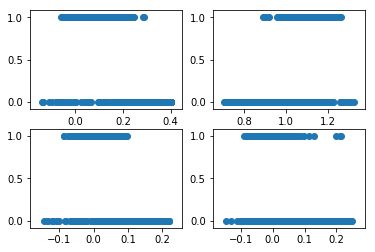

In [27]:
#plt.scatter(X[:,0],Y)
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
plt.subplot(2,2,1)
plt.scatter(X[:,0],Y)

plt.subplot(2,2,2)
plt.scatter(X[:,1],Y)

plt.subplot(2,2,3)
plt.scatter(X[:,2],Y)

plt.subplot(2,2,4)
plt.scatter(X[:,3],Y)

2\. Build a logistic regression model with 5-fold cross validation; you can use the function cross_val_predict (an example of the usage can be found in the Special Report 2 notebook) to build the array with the predicted labels. Report the r2_score. Save the array with the predictions because you will need it later.

In [48]:
import warnings
warnings.filterwarnings(action='ignore')
model=LogisticRegression()
pred=cross_val_predict(model,X,Y,cv=5)
scores=cross_val_score(model,X,Y,cv=5)
print(scores)
metrics.r2_score(Y,pred) #r2 score

[0.93963783 0.96579477 0.97183099 0.96975806 0.94758065]


0.7378198757763976

3\. Now build a linear regression model with 5-fold cross validation just as above; report the r2_score. Save the array with the predictions because you will need it later. 

In [50]:
model2=LinearRegression()
pred2=cross_val_predict(model2,X,Y,cv=5)
scores2=cross_val_score(model2,X,Y,cv=5)
print(scores2)
metrics.r2_score(Y,pred2)

[  0.           0.           0.           0.         -37.15384615]


-0.4555863740852395

4\. Plot the histograms of the "prediction" arrays for logistic and linear regression. Remember to use labels to identify the two distributions.

(array([616.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 129.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

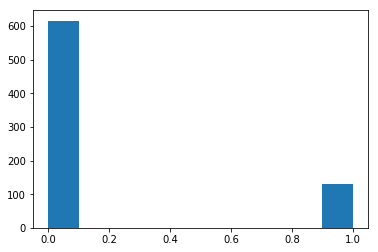

In [56]:
plt.hist(pred) #logistic regression

(array([ 132., 1184.,  944.,  158.,   26.,    8.,   10.,    6.,    7.,
           8.]),
 array([-0.33724954, -0.15552543,  0.02619868,  0.20792279,  0.38964689,
         0.571371  ,  0.75309511,  0.93481922,  1.11654333,  1.29826744,
         1.47999155]),
 <a list of 10 Patch objects>)

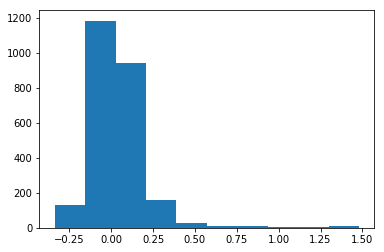

In [52]:
plt.hist(pred2)

5\. How do the predictions differ? Which of the two models is essentially behaving like a classifier, and why?

Comparing the two histograms, we notice that the logistic regression is take either 0 or 1 as values while the linear regression model takes values from approximatly -0.3 to 1.5
The regression model is behaing like a classifier because it simply give only two options either false 0 or right 1

The Logistic Regression model also has an option called "predict.proba", demonstrated in the code below:

Text(0, 0.5, 'Class')

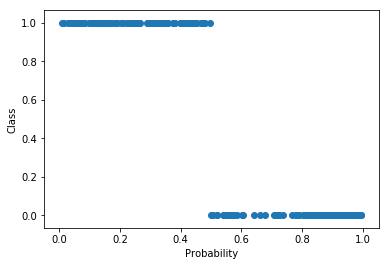

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
probs = model2.predict_proba(X_test)
pred = model2.predict(X_test)

plt.scatter(probs[:,0], pred);
plt.xlabel('Probability')
plt.ylabel('Class')

6\. Based on the code and figure above, what is the difference between using"predict" and "predict_proba"? What is the probability value that corresponds to transitioning from one class to the other?

7\. For this second part, we are going to use the "study hours data set" from the Linear Regression part (you can find the data set, called data_students_hours.csv, on Blackboard). Define an array x (features) with the first column of this file and an array y (labels) with the second column.

In [97]:
import pandas as pd
data=pd.read_csv('data_s_h.csv')
data.columns=['hours','scores']
data.head()

,hours,scores
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [98]:
x=data['hours']
y=data['scores']

8 \. In the linear regression notebook, we went through an example and calculated the model coefficients of a linear regression model applied to these data. In the plot of the best fit line, what is the meaning of m and b?

9\. However these can also be calculated by hand using the formulas on the linear regression slides. Code up the formulas below and report your coefficients for slope and intercept.

In [99]:
%%latex

\begin{equation}

S S_{xy} = \sum x_i y_i - (\sum x_i \sum y_i)/n \\

S S_{xx} = \sum x_i^2 - (\sum x_i)^2 / n \\

m = S S_{xy}/ S S_{xx} \\

b = \bar{y} - m * \bar{x}

\end{equation}

where n = number of points and the overhead bar represent the mean.



<IPython.core.display.Latex object>

In [100]:
SS_xy=sum(x*y)-sum(x)*sum(y)/np.size(x)
SS_xy

11754.42743777961

In [101]:
SS_xx=sum(x*x)-((sum(x))**2)/np.size(x)
SS_xx

9130.663879043655

In [137]:
M=SS_xy/SS_xx
M

1.287357370010949

In [138]:
B=y.mean()-m*x.mean()
B

9.90860619032562

10\. Looking at the data (hours vs scores), do you think it would make sense to fit these data using a logistic regression model? Why or why not?

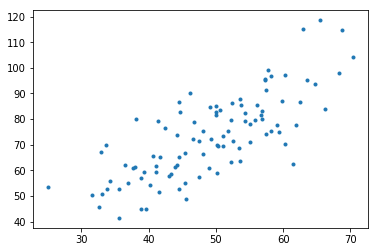

In [108]:
plt.plot(x,y,'.')

Extra credit: Run the gradient descent notebook and report the coefficients you found here. Calculate the cost function (found in the linear regression notebook) for the slope, intercept values you found with the gradient descent method and the values you found above, using the formulas. Which set of values is best? 


TypeError: 'str' object is not callable

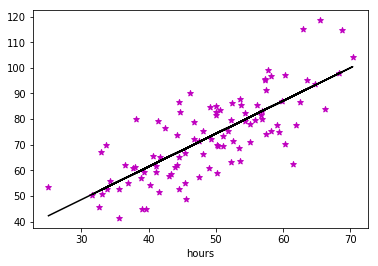

In [151]:
plt.scatter(x,y,marker='*',color = 'm');

plt.plot(x, m*x + b, color = 'k')

plt.xlabel('hours')

plt.ylabel('test scores')